# Question 2

## Imports

In [1]:
from src.utils.utils_movie import *
from src.utils.utils_wars import *
from src.utils.interactive_plots import *
# from static_plots import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
movies = load_data_movies(movies_path_base)
wars = load_data_wars(wars_path_base)

In [3]:
movies.head()

,Movie_ID,IMDb_Index,Title,Original_Title,Release_Date,Year,Genres,Genres_IMDb,Rating,Votes,Revenue,Length,Languages,Countries,summary
0,975900,tt0228333,Ghosts of Mars,Ghosts of Mars,2001-08-24,2001,"[Thriller, Science Fiction, Horror, Adventure,...","[Action, Horror, Sci-Fi]",4.9,58872,14010832.0,98.0,['English Language'],[United States of America],"Set in the second half of the 22nd century, th..."
1,261236,tt0083949,A Woman in Flames,Die flambierte Frau,1983,1983,[Drama],[Drama],5.9,648,NaN,106.0,['German Language'],[Germany],"Eva, an upper class housewife, becomes frustra..."
2,171005,tt0097499,Henry V,Henry V,1989-11-08,1989,"[Costume drama, War film, Epic, Period piece, ...","[Biography, Drama, History]",7.5,32088,10161099.0,137.0,['English Language'],[United Kingdom],{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...
3,77856,tt0058331,Mary Poppins,Mary Poppins,1964-08-27,1964,"[ChildrensFamily, Musical, Fantasy, Comedy, Dr...","[Comedy, Family, Fantasy]",7.8,189202,102272727.0,139.0,['English Language'],[United States of America],The film opens with Mary Poppins perched in a...
4,32456683,tt0061637,Die Fahne von Kriwoj Rog,Die Fahne von Kriwoj Rog,1967,1967,[],[Drama],7.7,24,NaN,108.0,['German Language'],[German Democratic Republic],"Otto Brosowski, a communist miner, writes to t..."


In [4]:
wars.drop(columns=["BatDeath", "Outcome"], inplace=True)
wars.head()

,StateName,Side,StartYear,EndYear,WhereFought,Movies
WarName,,,,,,
Second Sino-Japanese,Japan,1,1931,1933,7,931
Second Sino-Japanese,China,2,1931,1933,7,931
Chaco,Bolivia,2,1932,1935,1,1198
Chaco,Paraguay,1,1932,1935,1,1198
Saudi-Yemeni,Saudi Arabia,1,1934,1934,6,806


In [5]:
conflicts_to_check = []
war_names = list(set(sorted(wars.index)))
for war in war_names:
    print(war)
    war_data = wars[wars.index==war]
    side_1, side_2 = find_sides(war_data)
    start_year, end_year = find_years(war_data)
    movies_war = find_movies_year(movies, start_year, end_year)
    movies_war_1 = find_movies_side(movies_war, side_1)
    movies_war_2 = find_movies_side(movies_war, side_2)
    if movies_war_1 is not None and movies_war_2 is not None:
        conflicts_to_check.append(war)
print(f"The conflicts to check are {conflicts_to_check}")

Vietnam War, Phase 2
Invasion of Afghanistan
Invasion of Iraq
Six Day War
Assam
Gaza-Israel conflict
War over Lebanon
Russo-Georgian War
Sinai War
Communist Coalition
Third Sino-Japanese
World War II
Bangladesh
War of Attrition
Franco-Thai
Ugandian-Tanzanian
Second Ogaden War, Phase 2
IfniWar
Sino-Vietnamese Punitive
Bosnian Independence
Conquest of Ethiopia
Gulf War
War for Kosovo
Iran-Iraq
Second Laotian, Phase 2
War over Angola
First Libyan Civil War
Arab-Israeli
Nomonhan
Turco-Cypriot
Yom Kippur War
Soviet Invasion of Hungary
War over the Aouzou Strip
Kargil War
Off-shore Islands
First Kashmir
Sino-Vietnamese Border War
Azeri-Armenian
Badme Border
Korean
Russo-Finnish
Vietnamese-Cambodian
Second Sino-Japanese
Falkland Islands
Cenepa Valley
Football War
Saudi-Yemeni
Second Kashmir
Cold War
Chaco
Changkufeng
Heglig Crisis
Taiwan Straits
The conflicts to check are ['Vietnam War, Phase 2', 'Invasion of Iraq', 'Russo-Georgian War', 'Sinai War', 'Third Sino-Japanese', 'World War II', 'Si

Out of the list of conflicts obtained this way, we will focus our analysis on a subset of them, made of the ones with the highest historical importance and the highest amount of data in the dataset.   
The 4 conflicts we will focus on will be `Cold War`, `Korean War`, `Vietnam War` and `World War II`.

## Analysis 0

In this section we give a quick overview of the analyzed conflicts, by showing for each country a world map showing the countries on each side of the conflict.

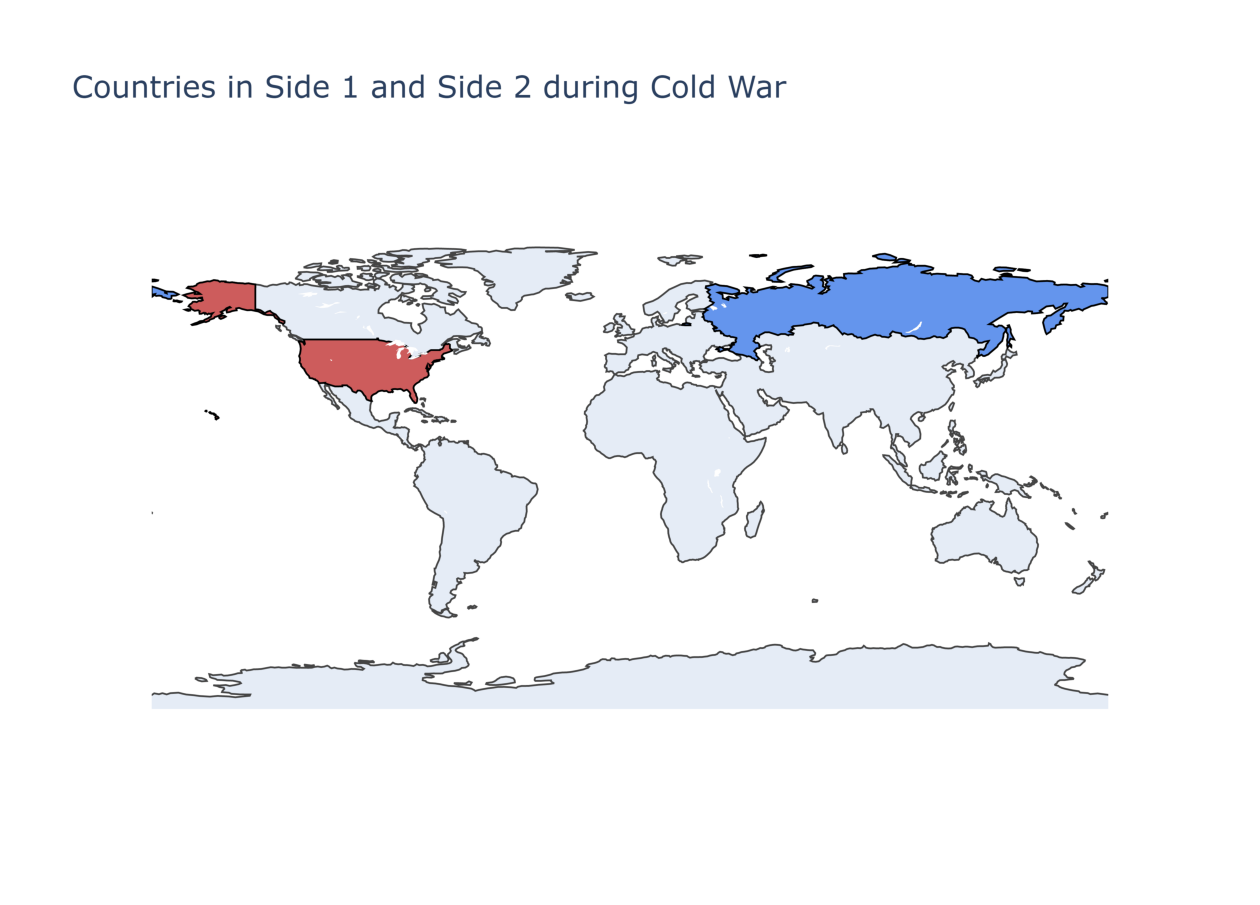

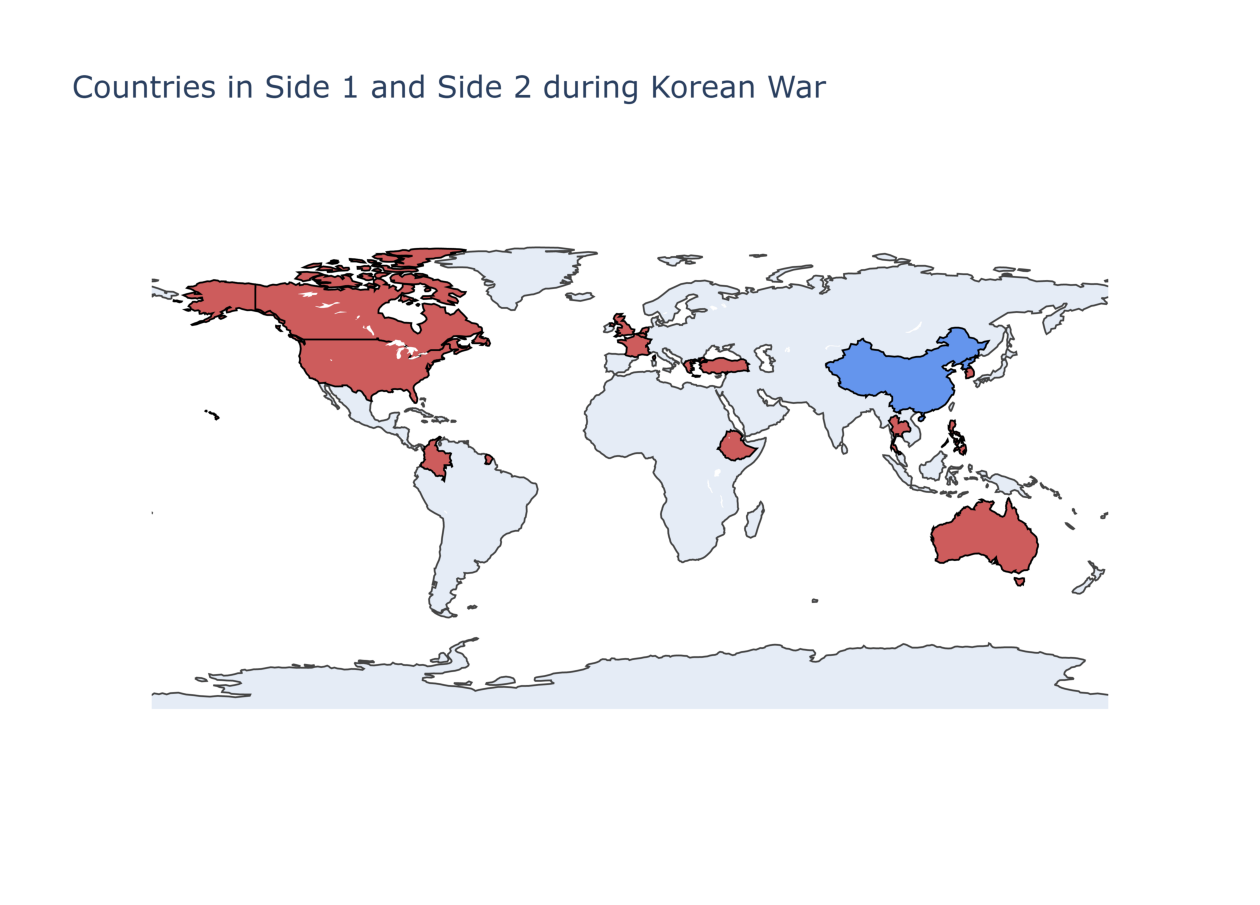

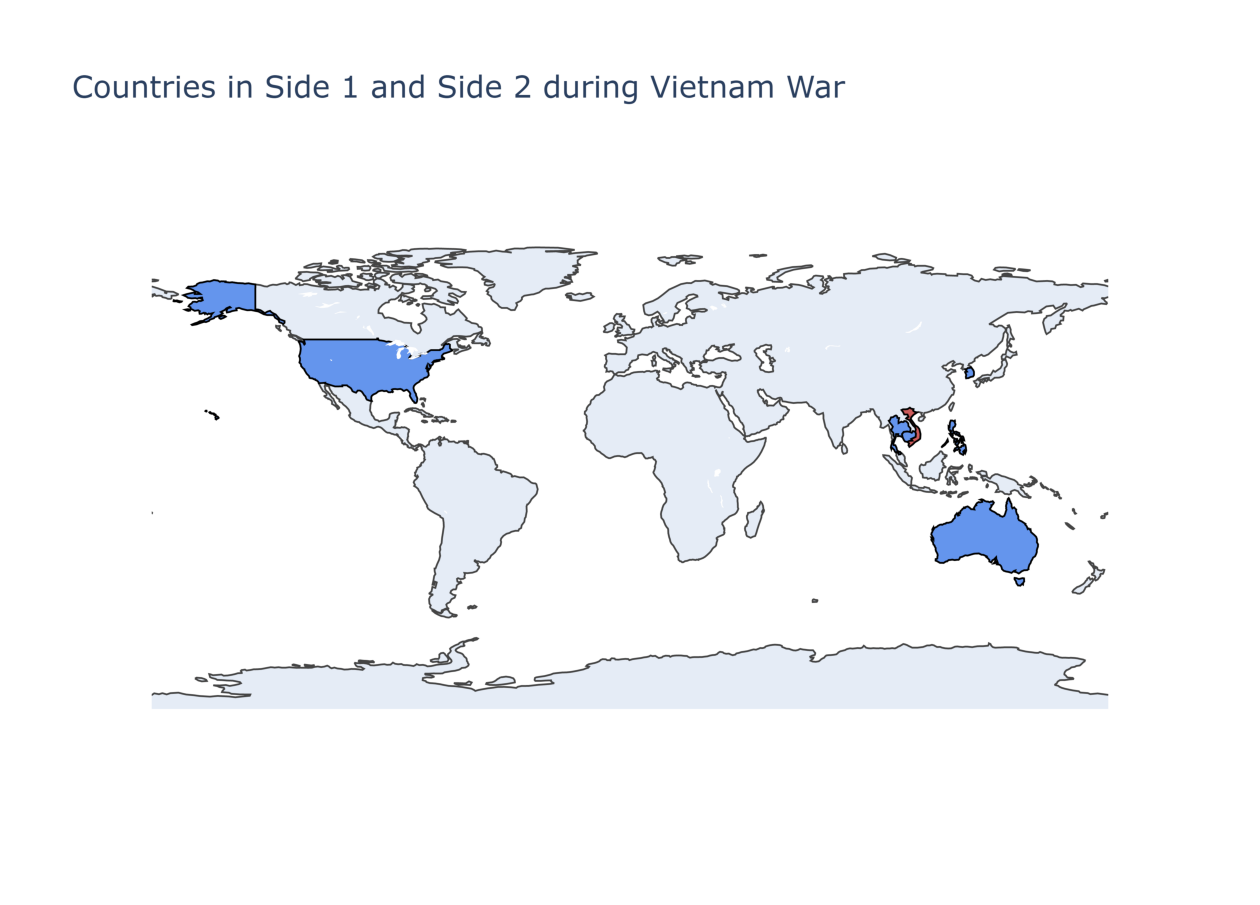

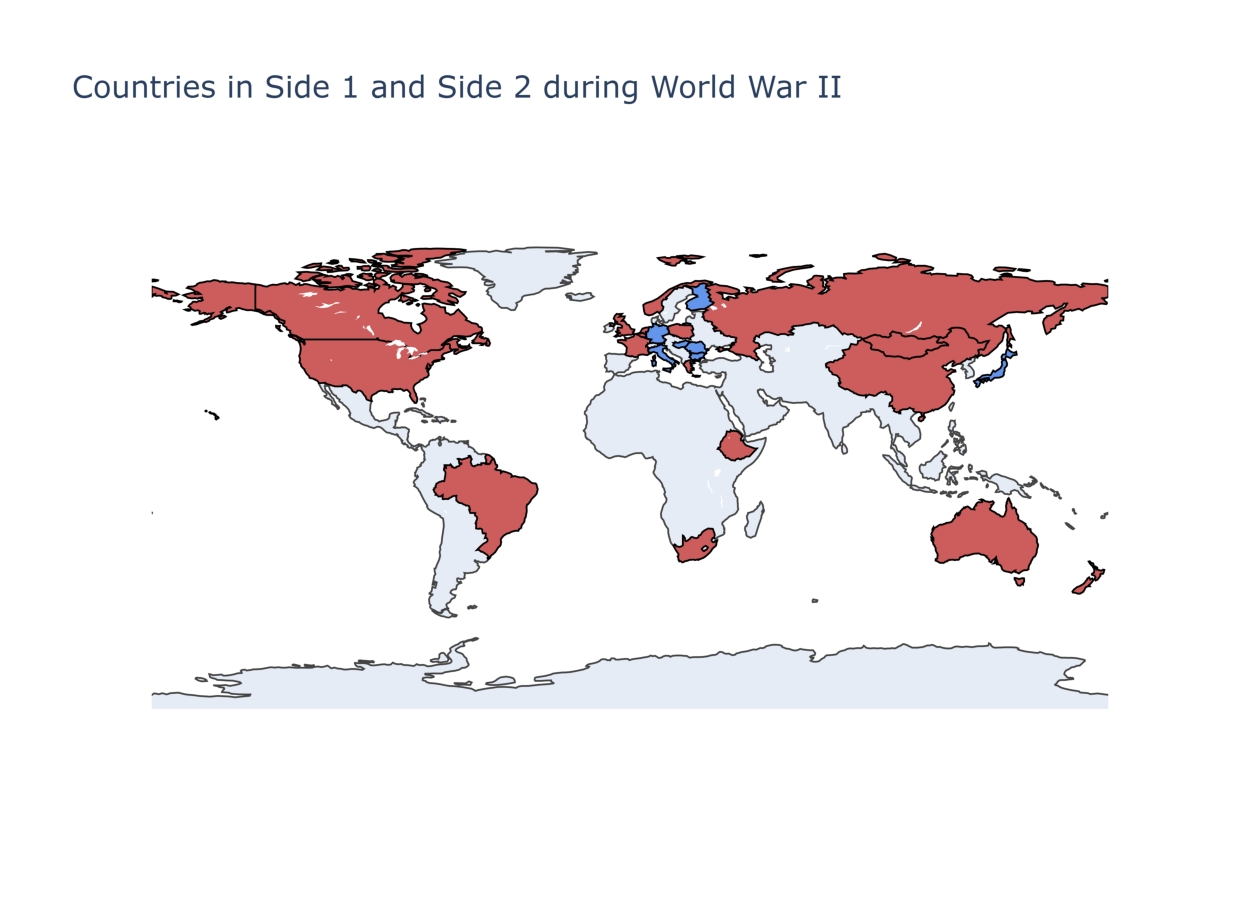

In [6]:
war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    side_1, side_2 = find_sides(wars[wars.index==war])
    plot_countries(side_1, side_2, war)

## Analysis I

In this section we provide a first analysis of the geographical connotation of the influence of these events on the movies produced.   
We filtered our dataset based on the movies released in a historical period around each of the analyzed war, and check what is the movie genre of the movies depicting countries from either side of the conflict.   
We plot our results in two barplots, one for each side of the war, each one showing not only the genre distribution for that period of time but also the genre distribution over the whole dataset, to provide through comparison additional information about the way this sentiment changed overtime.   

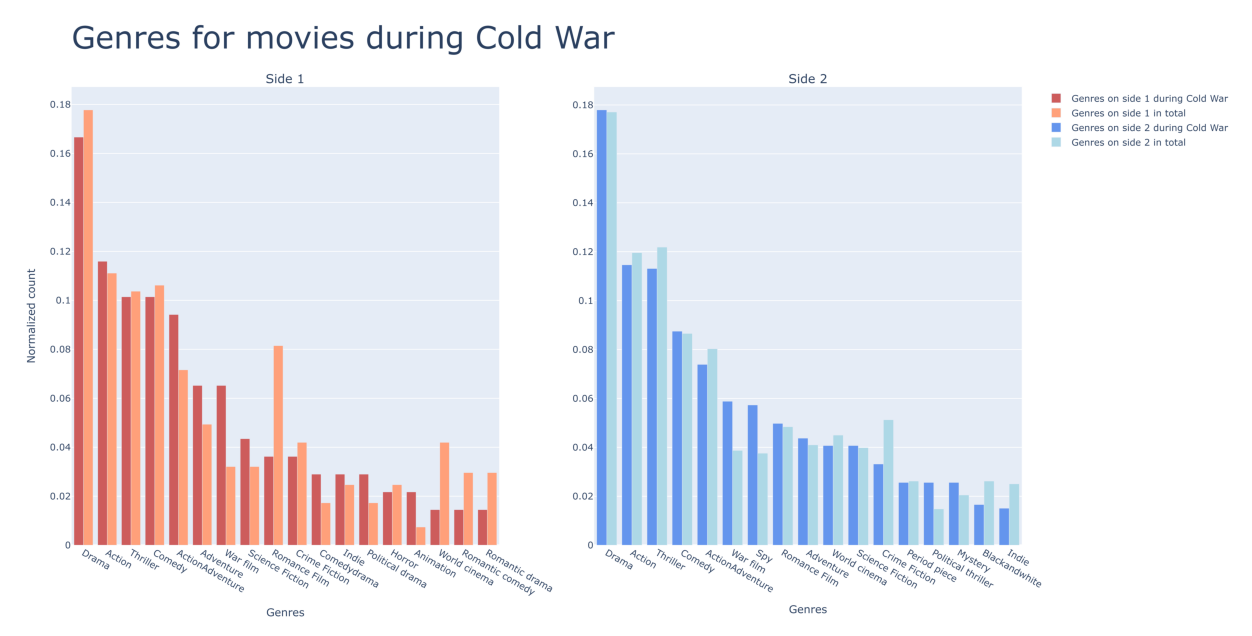

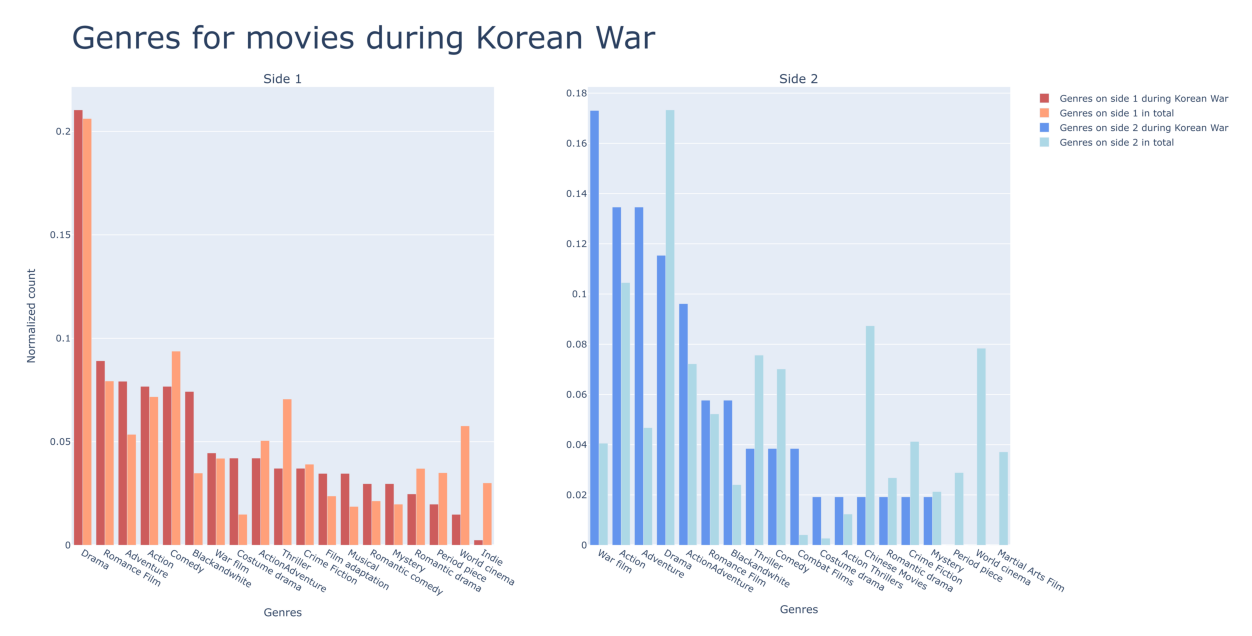

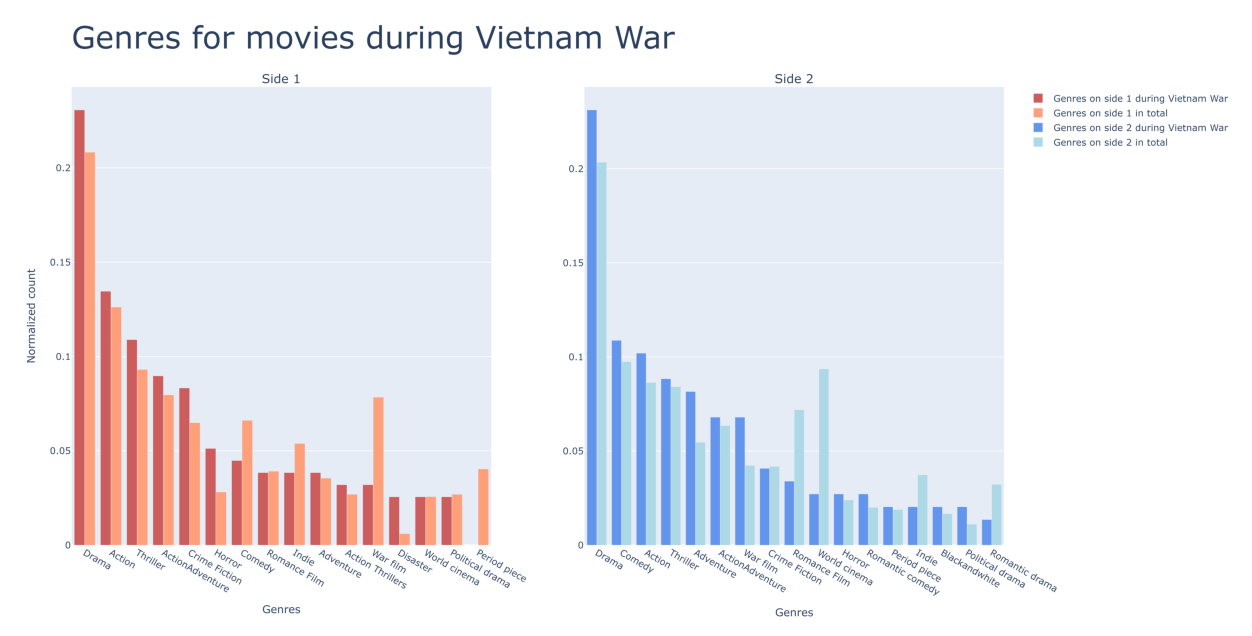

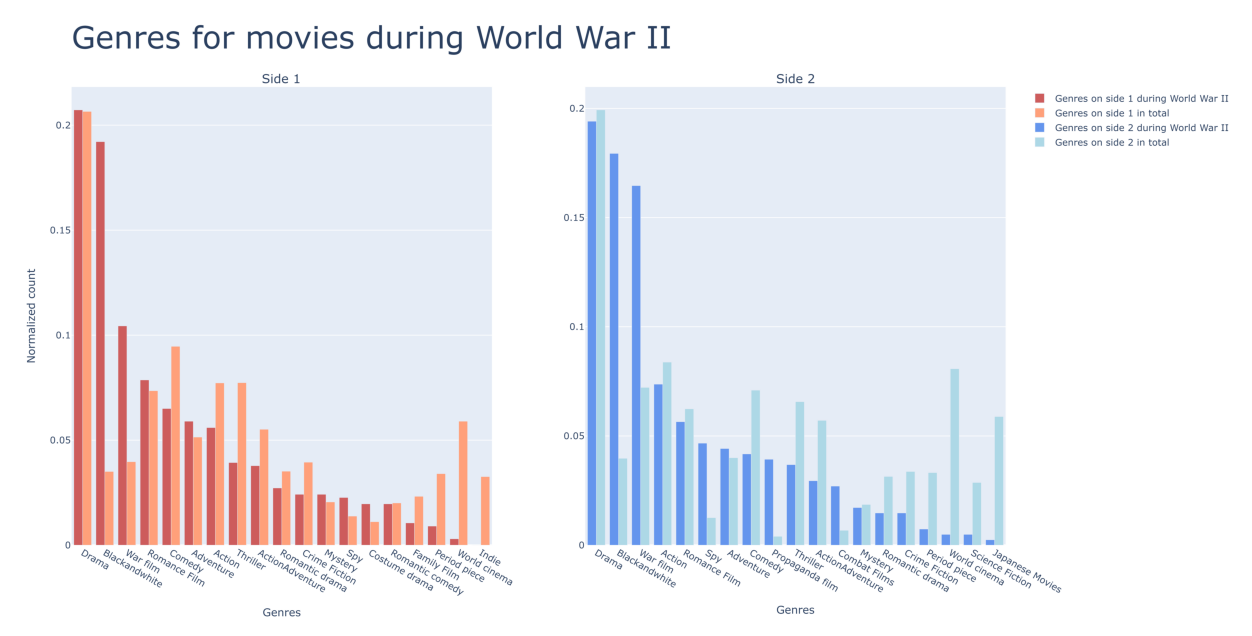

In [7]:
war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    plot_genres_year_side(*get_genres_year_side(wars, movies, war, mode="summary"))
    # plot_genres_year_side(*get_genres_year_side(wars, movies, war, mode="country"))

During the `Cold War`, Drama dominated both sides, reflecting its enduring role in storytelling. On Side 1, genres like Thriller, Action, and War Films were significant, alongside a notable presence of Political Drama and Science Fiction, which may mirror societal tensions of the time. On Side 2, Spy films and Thrillers stood out more, alongside Period Dramas, suggesting themes of espionage and historical reflection. Compared to the overall dataset, both sides experienced a spike in war-related and suspense genres during the Cold War, aligning with its geopolitical anxieties.

During the `Korean War`, Drama remained the top genre for both sides, but their focuses diverged slightly. On Side 1, there was a strong emphasis on Romance Films and Black-and-White films, along with notable contributions from Adventure and War Films. Meanwhile, Side 2 leaned more into Thriller, Combat Films, and Costume Drama, highlighting themes of conflict and cultural representation. Compared to their overall genre distributions, both sides showed increased focus on war-related genres, with Side 1 emphasizing romanticized narratives and Side 2 reflecting more action-driven storytelling.

The `Vietnam War` era saw Drama as the dominant genre on both sides. On Side 1, genres like Action, Thriller, and War Films took center stage, emphasizing the conflict's intensity. Meanwhile, Side 2 also featured Thriller prominently but included genres like Comedy and Political Drama, reflecting a mix of conflict-focused and escapist narratives. Compared to the overall dataset, both sides saw an increased emphasis on war and political genres during this period, with Side 2 incorporating more variety in tone through comedy and satire.

During `World War II`, Drama and Black-and-White films dominated the genre landscape on both sides. On Side 1, genres like War Films, Adventure, and Romance Films were prominent, reflecting themes of heroism and human struggle. On Side 2, Propaganda Films and Combat Films emerged, alongside Thrillers and Costume Dramas, showcasing narratives aligned with wartime efforts and cultural expression. Compared to their total distributions, both sides saw significant spikes in war-focused genres, with Side 2 emphasizing propaganda and Side 1 highlighting wartime romance and heroism.

## Analysis II

This second section of the analysis focuses instead on movies depicting the war, filtered from our original dataset by looking for the names of the war (opportunely cleaned). Once again we analyze the difference in distribution between various genres, but this time the distinction between the two sides is done by looking at the country the movie is produced in.

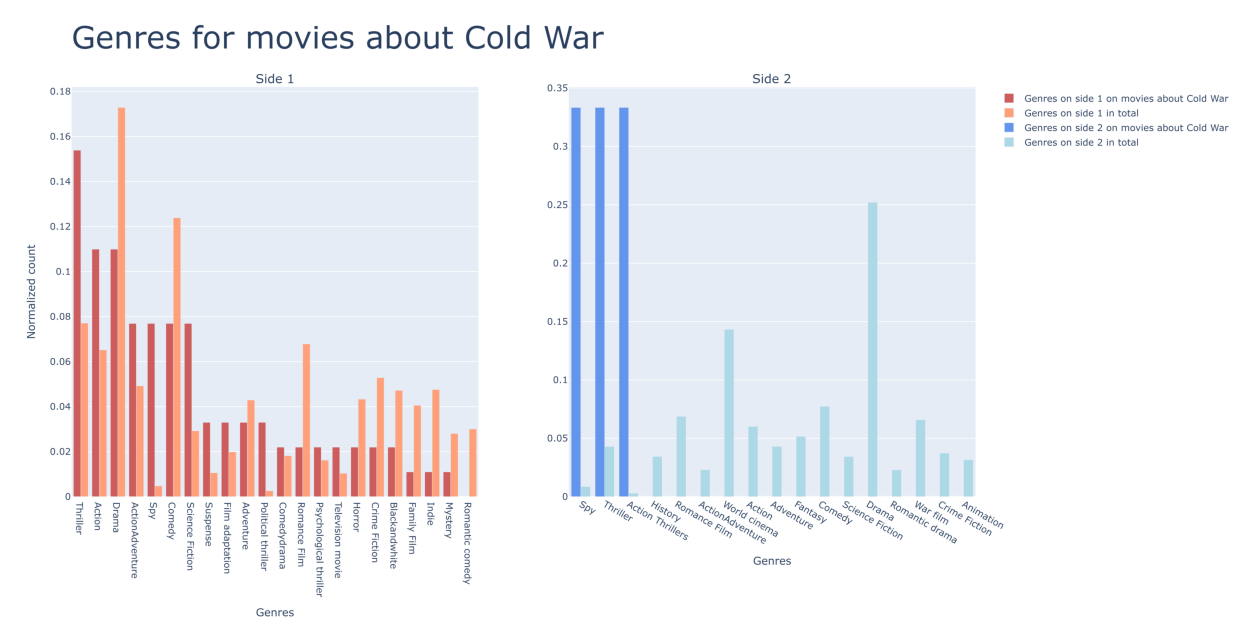

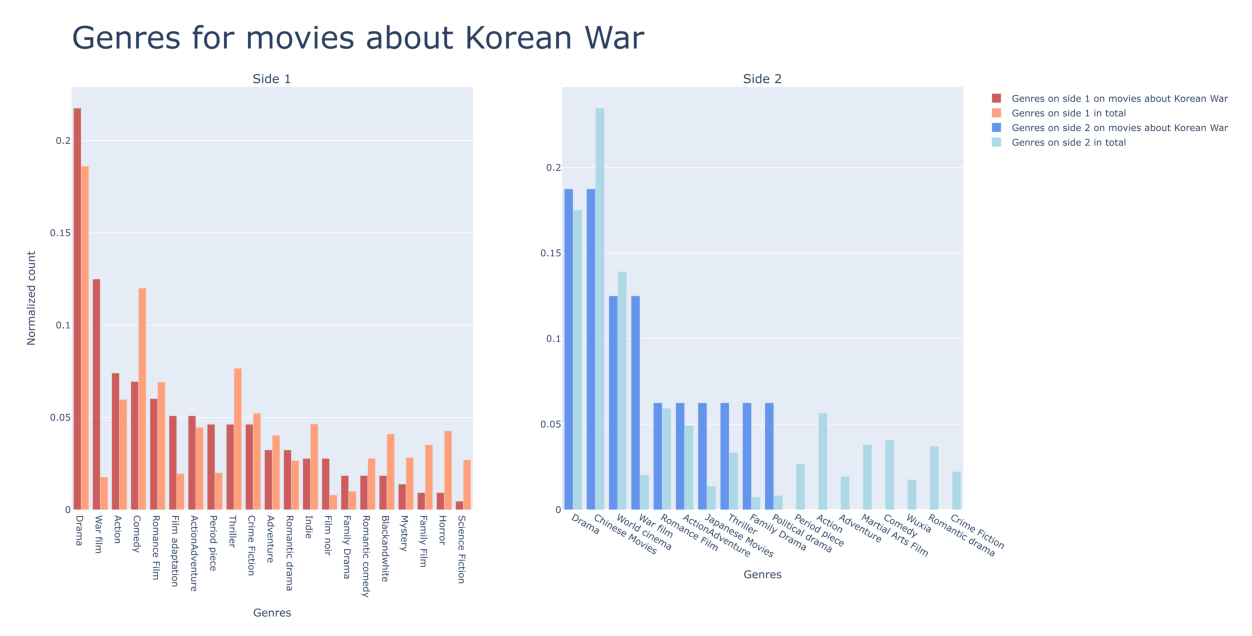

Not Enough Data


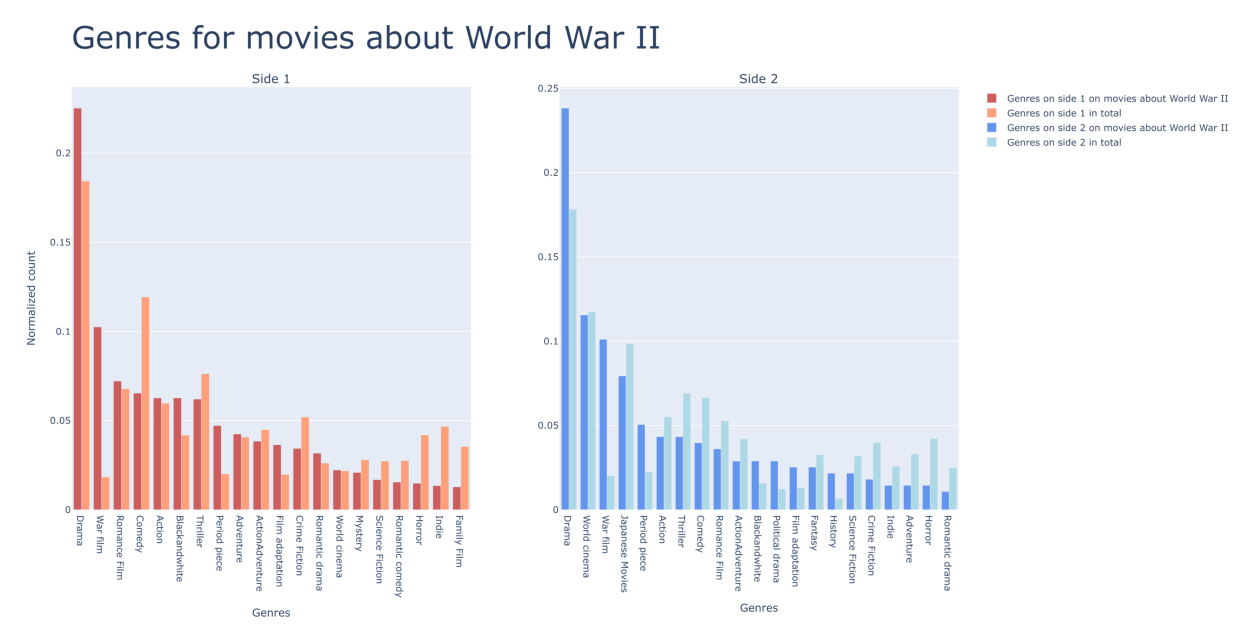

In [8]:
war_names_r = ["Cold War", "Korean", "Vietnam War, Phase 2", "World War II"]
for war in war_names_r:
    plot_genres_summary_side(*get_genres_summary_side(wars, movies, war, mode="country"))
    # plot_genres_summary_side(*get_genres_summary_side(wars, movies, war, mode="summary"))

A fisrt thing easy to notice is the fact that for both `Cold War` and `Korean War` one side has much fewer movies compared to the other , while for the `Vietnam War` not enough movies were found for one of the two sides, hence no plot was produced.   
This leads to a the results relative to these plots less significant overall, but we decided to still mention them for completeness.

Movies about the `Cold War` display a strong focus on Thriller, Spy, and Action genres. On Side 1, Drama and Thriller dominate, with notable emphasis on Spy films reflecting political tension and espionage themes. On Side 2, Thriller and Spy genres stand out even more prominently, with Action Thrillers receiving a significant share. Compared to the overall dataset, genres such as Spy and Political Thriller become far more prevalent, capturing the paranoia and secrecy characteristic of the Cold War.

Movies about the `Korean War` highlight Drama, War Films, and Action on both sides. Side 1 emphasizes Drama as the leading genre, with War Films and Action genres also receiving considerable attention. On Side 2, Chinese Movies and World Cinema stand out, reflecting regional influences and storytelling traditions. Compared to the total dataset, War Films and Chinese Movies gain prominence, showcasing the somber tone and regional cinematic focus associated with the Korean War.

`World War II` movies prominently feature Drama, War Films, and Period Pieces across both sides. Side 1 strongly highlights Drama, War Films, and Black-and-White genres, emphasizing the historical and serious tone of the conflict. Side 2 includes World Cinema, Japanese Movies, and Period Pieces, reflecting regional diversity in storytelling. Compared to the overall dataset, genres such as Period Piece and Black-and-White are significantly elevated, underscoring the historical importance and widespread cinematic coverage of World War II.

## Analysis III

In this third section we filter the movies by looking at the summaries as in the previous point, and we look to how many movies about each war were released over the course of the years.

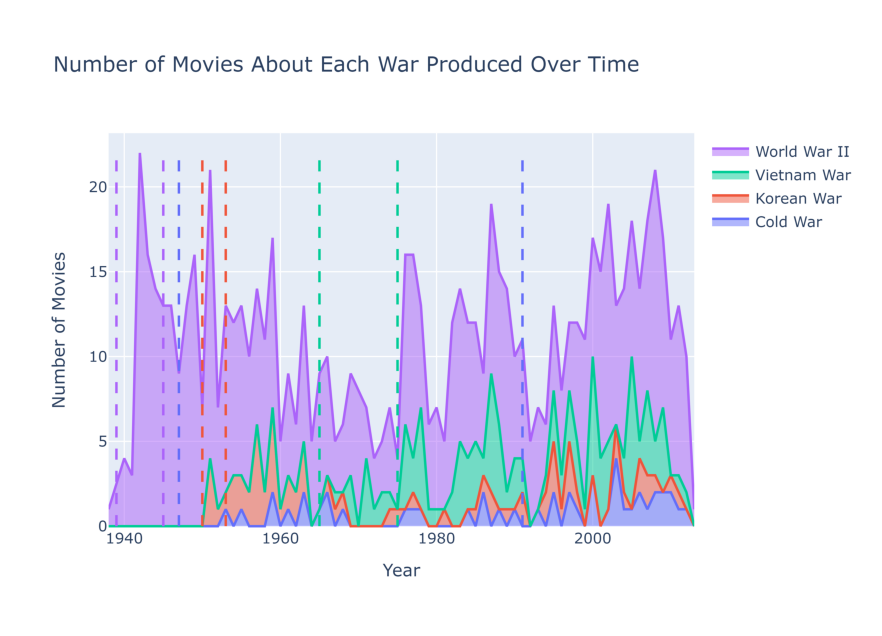

In [9]:
plot_movies_timeline(wars, movies, war_names_r, True)

The plot shows a large area associated to movies related to `World War II`, much larger than that of all other conflicts combined. This highlights the influence a conflict of such scale has had on the world even further in the future.   
A more in-depth inspection of the graph shows how, despite the general movies trend are characterized by an overall increase in movies produced every year, the peak in production of WWII movies has peaked during the conflict itself, to then decrease gradually over time to then settle between 10-15 movies a year in the XXI century.   
Movies on the `Vietnam War` were not produced inconsistently across all years starting from the war, reaching their peak in 2005 with 9 movies.   
The `Korean War` has had its highest movies production in the period right after the war, in the 1950s, after which it hasn-t received much attention in the cinematographic world, achieving at most 3 movies per year ever since.   
Finally, contrary to our expectations, the `Cold War` itself didn't get much attention during the course of the years, with no more than 4 movies produced in a given year making it the lowest in our analysis.

## Analysis IV

This final section of geographical analysis is made through the use of sunburst charts, which show how many movies about each war were produced by either side, entering in details of the single countries from either (or neither) side.

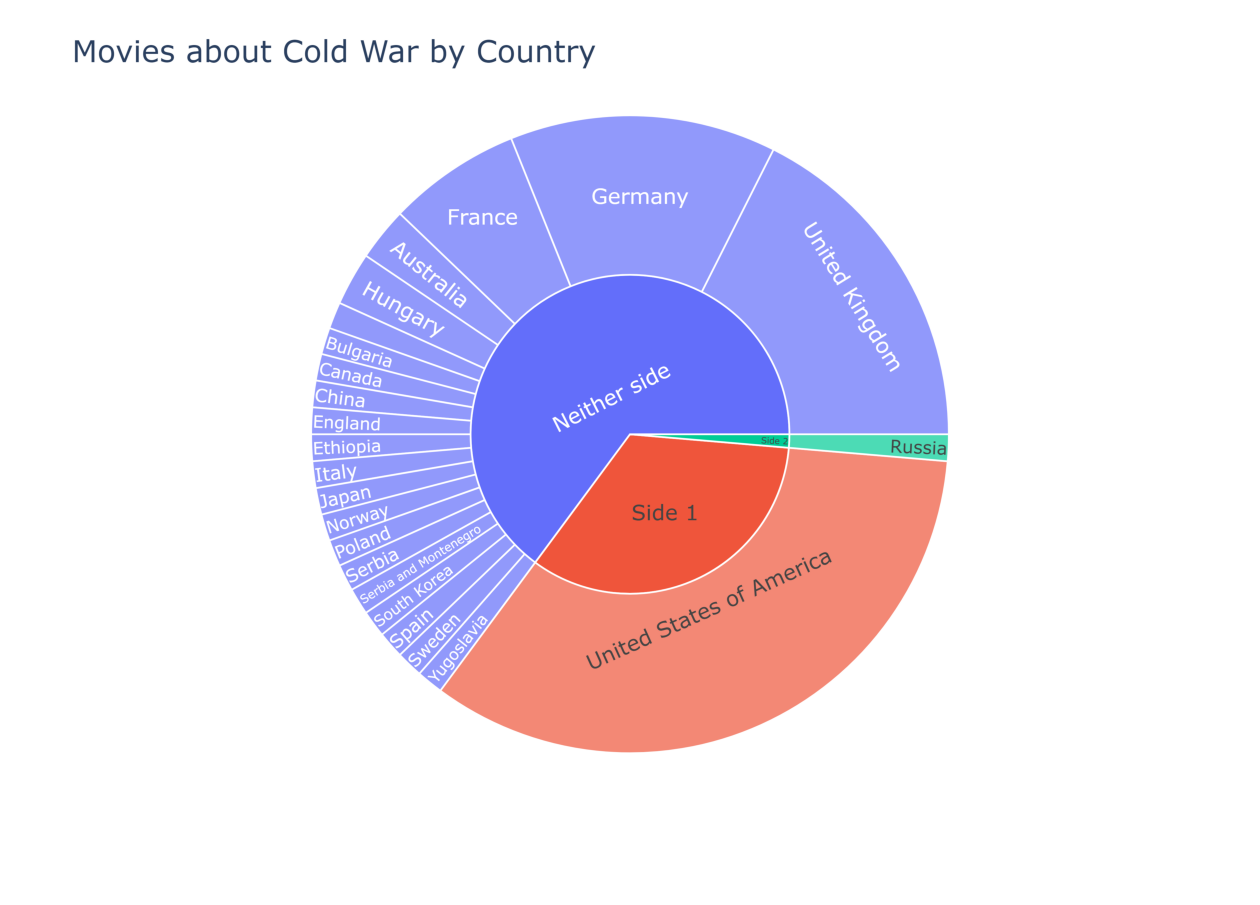

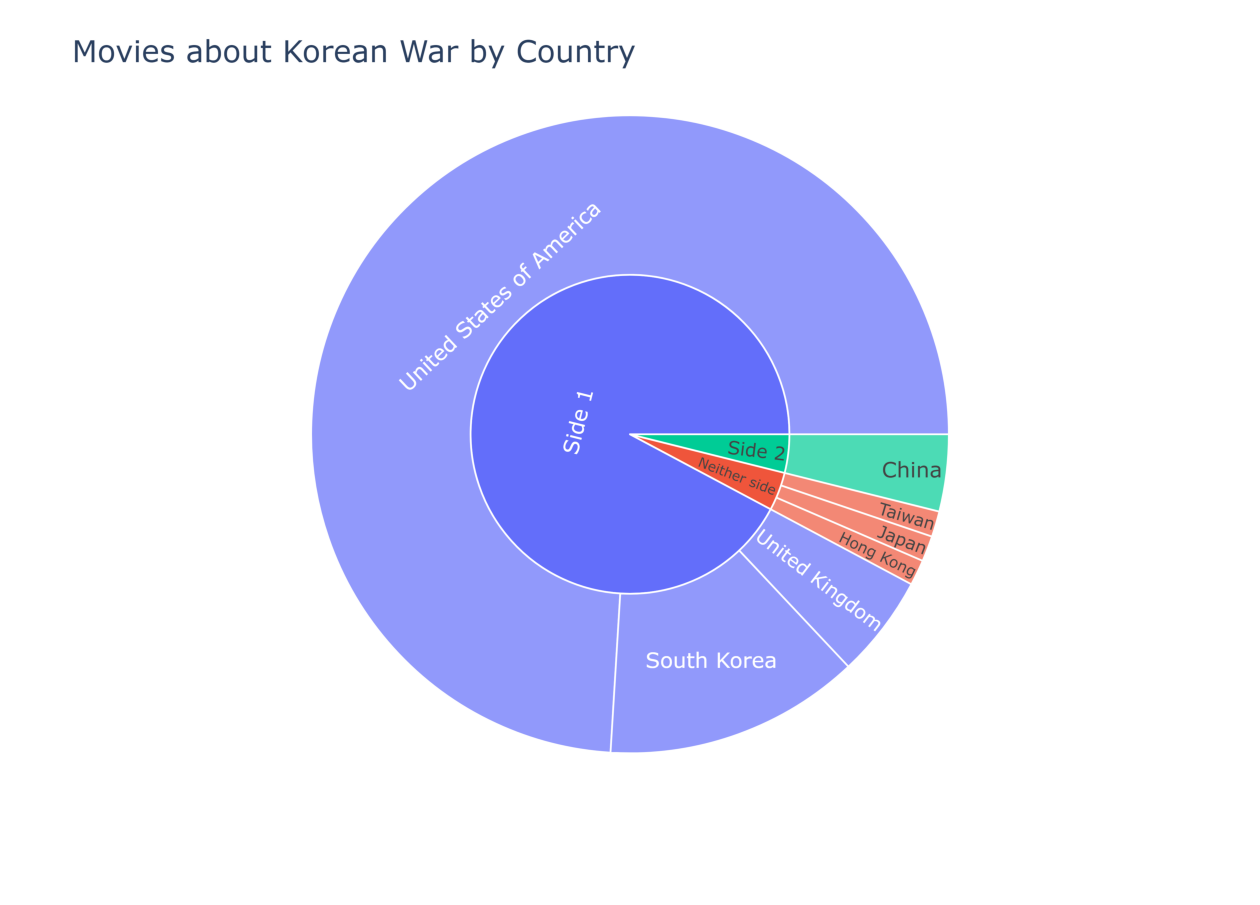

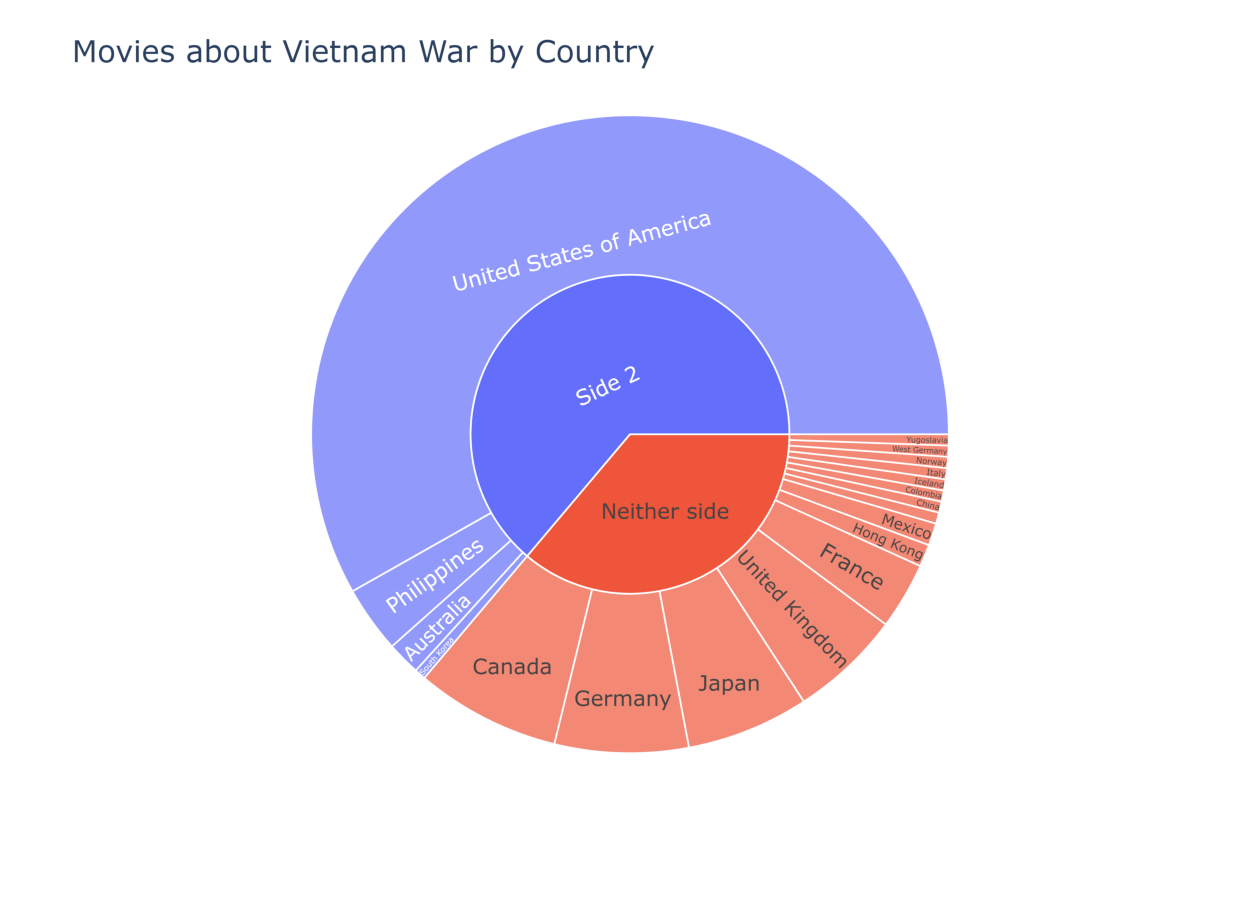

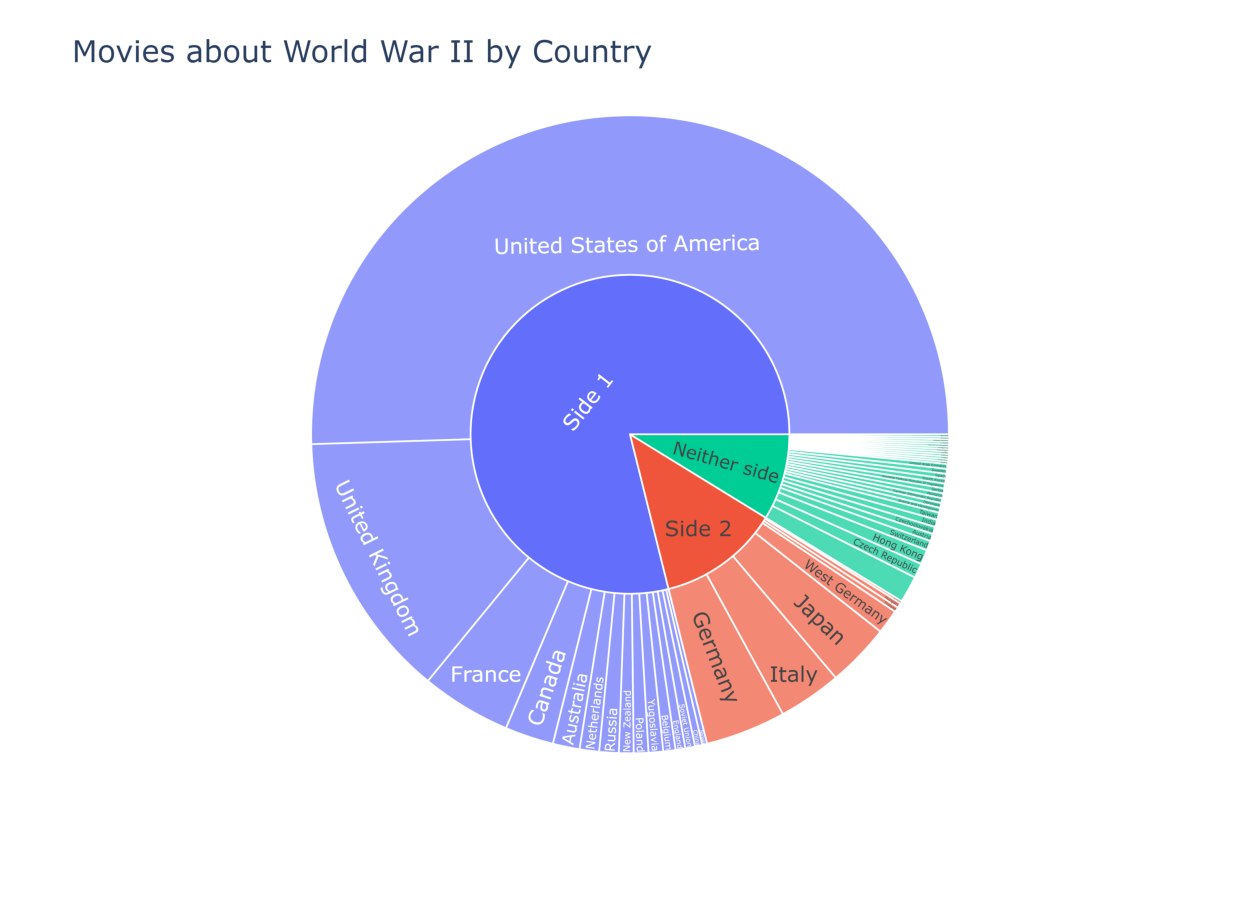

In [10]:
for war in war_names_r:
    plot_country_piechart(wars, movies, war)

A comment which can be made for each of these graphs is that United States take up the largest slice of the chart divided by countries, and this is largely due to the fact that the United States contribute in the largest amount to all movies produced, regardless of the topic.   

Entering more in detail, we see that for the `Cold War` the largest part of the movies were produced by countries not directly involved in the conflict, showing how such a conflict has impacted the whole world and not only the two opposing sides. As stated before, the USA contribute to the largest part of the movies, while Russia, despite being one of the two involved countries, only amounts to a single movie in our chart, surpassed by the large european countries such as Germany, UK and France.

Once again, for the `Korean War`, most of the movies were produced by the USA, but if we exclude its contribution we can see that South Korea, one of the countries directly involved in the conflict, is the largest producer of movies on the conflict. Follow the UK and China, alongside some other Asian countries.

For the `Vietnam War` we can see from the chart that no movies about it were released in Vietnam, only country directly involved in the war as "Side 2" in our dataset, while the movies are almost equally distributed among the various countries (as usual, exception made for the USA).

Finally, regarding `World War II`, we can see that the largest forces of the conflict lead the movie production, with the USA having released more than 400 movies, the UK more than 100 and countries such as France, Germany, Italy and Japan all with more than 20 movies each.
On top of this, the massive influence of the conflict can also be seen from the large number of smaller countries having released some movies about it, with movies released in more than 50 countries in total!